In [3]:
import json
import pandas as pd
from inseq.data import FeatureAttributionOutput
import numpy as np
import matplotlib.pyplot as plt


# Path to your saved JSON file
json_path = 'attributions_normal_train.json'

# Load the attribution output
out = FeatureAttributionOutput.load(json_path)

# Extract primitive dicts
dicts = out.get_scores_dicts()

# Convert source attributions to DataFrame for the first sequence
df = pd.DataFrame(dicts[0]['source_attributions'])
df.index.name = 'Generated Token'
df.columns.name = 'Input Token'
df

,,1,2,3,4,5,6
,,▁<extra_id_0>,▁,meisje,▁met,▁down,</s>
0,▁mens,0.028814,0.020719,0.013214,0.008867,0.011292,0.016554
1,▁(,0.026415,0.054021,0.013131,0.009485,0.010052,0.027778
2,c,0.019671,0.020503,0.007039,0.005355,0.006198,0.014515
3,r,0.017816,0.008058,0.010936,0.005453,0.008140,0.007225
4,m,0.017105,0.009369,0.007265,0.005523,0.006860,0.007546
5,),0.014846,0.018800,0.008244,0.012530,0.011810,0.015993
6,▁,0.017525,0.037167,0.027049,0.023810,0.020194,0.021556
7,oordeel,0.016020,0.015291,0.014160,0.013379,0.015438,0.013820
8,de,0.014490,0.010370,0.010773,0.012011,0.014038,0.006496


## Visualizations

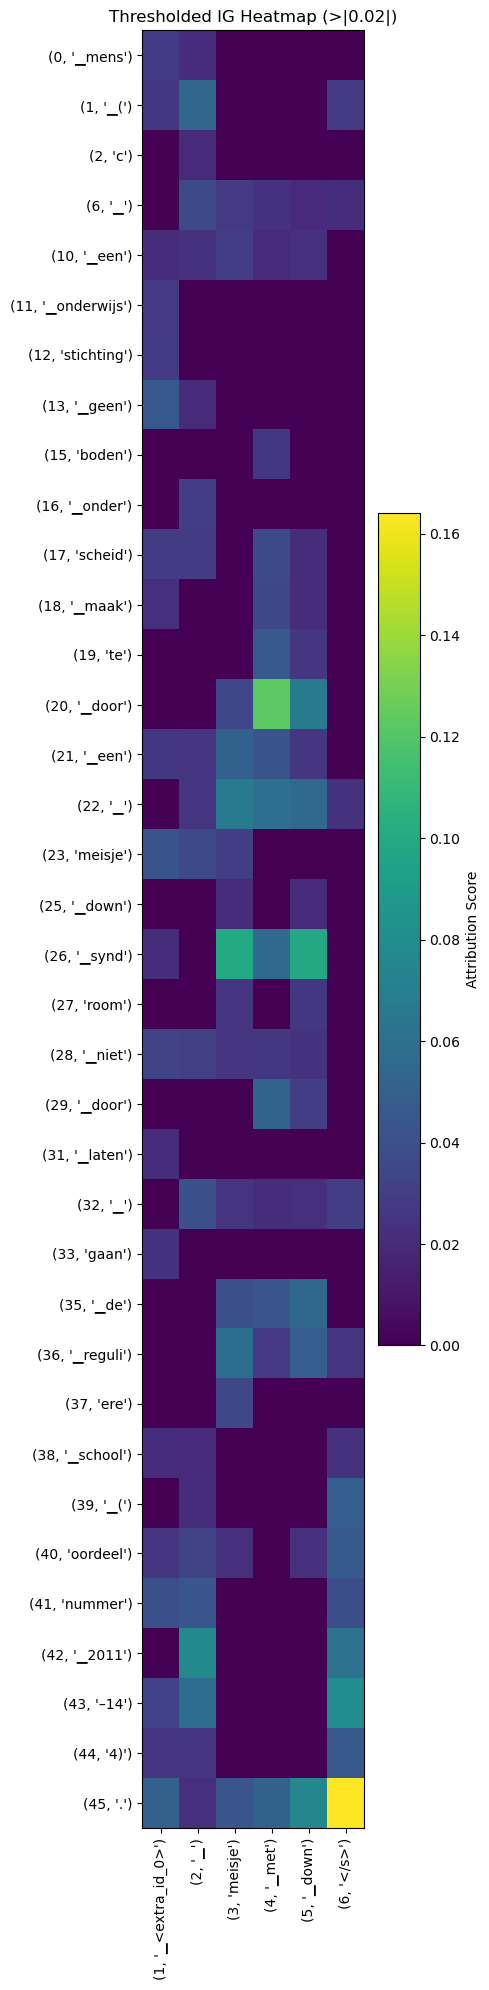

In [5]:
import matplotlib.pyplot as plt
# 1. Compute masks of “important” tokens
col_mask = df.abs().max(axis=0) > 0.02        # keep input tokens with any cell > 0.02
row_mask = df.abs().max(axis=1) > 0.02        # keep generated tokens likewise

# 2. Filter the DataFrame
df_thresh = df.loc[row_mask, col_mask]

# 3. (Optional) Zero-out small values so they disappear in the colormap
df_plot = df_thresh.where(df_thresh.abs() > 0.02, 0.0)

# 4. Plot
plt.figure(figsize=(len(df_plot.columns)*0.5+2, len(df_plot.index)*0.5+2))
plt.imshow(df_plot.values, aspect="auto")
plt.xticks(np.arange(len(df_plot.columns)), df_plot.columns, rotation=90)
plt.yticks(np.arange(len(df_plot.index)), df_plot.index)
plt.colorbar(label="Attribution Score")
plt.title("Thresholded IG Heatmap (>|0.02|)")
plt.tight_layout()
plt.show()